In [1]:
import deepconfig

In [2]:
dc = deepconfig.deepconfig(backend='tensorflow')

using gpu
using tensorflow


In [ ]:

import theano

In [ ]:
import os
os.environ['PYTHONPATH']=os.getenv('PYTHONPATH')+':/data/shared/Software/'
os.environ['LD_LIBRARY_PATH'] = os.getenv('LD_LIBRARY_PATH')+':/usr/local/cuda-7.5/targets/x86_64-linux/lib/'

In [ ]:
os.getenv('LD_LIBRARY_PATH')

In [3]:
import tensorflow as tf

In [4]:
from keras.models import Sequential, Graph
from keras.layers.core import Dense, Activation, Merge, Dropout
from keras.optimizers import SGD
import h5py 
import os
import numpy as np

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

In [6]:
from trackerModel import trackerModel

In [7]:
tracker = trackerModel( nlayers = 4, radius_layer=10, lenght_layer=20., cell_size=1., min_n_tracks=50, max_n_tracks=100, target_curv=True)
val_tracker = trackerModel( nlayers = 4, radius_layer=10, lenght_layer=20., cell_size=1., min_n_tracks=50, max_n_tracks=100, target_curv=True)

shape of layer input 0 (62, 20, 1)
shape of layer target 0 (62, 20, 1)
shape of layer input 1 (125, 20, 1)
shape of layer target 1 (125, 20, 1)
shape of layer input 2 (188, 20, 1)
shape of layer target 2 (188, 20, 1)
shape of layer input 3 (251, 20, 1)
shape of layer target 3 (251, 20, 1)
shape of layer input 0 (62, 20, 1)
shape of layer target 0 (62, 20, 1)
shape of layer input 1 (125, 20, 1)
shape of layer target 1 (125, 20, 1)
shape of layer input 2 (188, 20, 1)
shape of layer target 2 (188, 20, 1)
shape of layer input 3 (251, 20, 1)
shape of layer target 3 (251, 20, 1)


In [8]:
internal = int(tracker.full_size*1)

In [ ]:
d,t = tracker.make_event()

In [ ]:
len(d),len(t)

In [ ]:
len(set(t))

In [1]:
from keras.models import Model
from keras.layers import Input, Convolution2D, MaxPooling2D, Flatten, Merge, Dense, Dropout, merge

Using Theano backend.
Using gpu device 0: GeForce GTX TITAN X (CNMeM is disabled, cuDNN 5005)

Couldn't import dot_parser, loading of dot files will not be possible.


Regression on the curvature of the pixl, does not require any specific treatement

In [10]:
with tf.device('/cpu'):
    i = Input(shape=(tracker.full_size,), name='pixelbits')
    o = i
with tf.device('/gpu:0'):
    for ilayer in range(1):
        o = Dense(internal,activation='relu')(o)
with tf.device('/gpu:1'):
    pre_merge = Dense(tracker.full_size,activation='relu',name='premerge')(o)
    ## making a mask of the output by the input
with tf.device('/cpu'):
    o = merge([i,pre_merge], mode='mul')

    model = Model(input=i, output=o)

    model.compile(optimizer='adam', loss='mse')


In [ ]:
model.summary()

In [10]:
i = Input(shape=(tracker.full_size,), name='pixelbits')
o = i 
for ilayer in range(0):
    o = Dense(internal,activation='sigmoid')(o)
pre_merge = Dense(tracker.full_size,activation='sigmoid',name='premerge')(o)
## making a mask of the output by the input
o = merge([i,pre_merge], mode='mul')

model = Model(input=i, output=o)

model.compile(optimizer='adam', loss='mse',metrics = ['accuracy'])


In [9]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
pixelbits (InputLayer)           (None, 12520)         0                                            
____________________________________________________________________________________________________
premerge (Dense)                 (None, 12520)         156762920   pixelbits[0][0]                  
____________________________________________________________________________________________________
merge_1 (Merge)                  (None, 12520)         0           pixelbits[0][0]                  
                                                                   premerge[0][0]                   
Total params: 156762920
____________________________________________________________________________________________________


In [11]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=100)

Using a data generator to train that model

In [15]:
train_on = 1000
validate_on = 100
run_for = 10000
history = model.fit_generator(tracker.generator(train_on),
                    samples_per_epoch=train_on,
                    nb_epoch=run_for,
                    validation_data=val_tracker.generator(validate_on),
                    nb_val_samples=validate_on,
                    #callbacks=[early_stopping],
                    verbose=False
                   )

ResourceExhaustedError: OOM when allocating tensor with shape[12520,12520]
	 [[Node: Square_1 = Square[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/gpu:0"](gradients/MatMul_grad/MatMul_1)]]
	 [[Node: sub_11/_50 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/gpu:1", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_397_sub_11", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/gpu:1"]()]]
Caused by op u'Square_1', defined at:
  File "/usr/lib/python2.7/runpy.py", line 162, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python2.7/dist-packages/traitlets/config/application.py", line 592, in launch_instance
    app.start()
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelapp.py", line 389, in start
    ioloop.IOLoop.instance().start()
  File "/usr/local/lib/python2.7/dist-packages/zmq/eventloop/ioloop.py", line 151, in start
    super(ZMQIOLoop, self).start()
  File "/usr/local/lib/python2.7/dist-packages/tornado/ioloop.py", line 866, in start
    handler_func(fd_obj, events)
  File "/usr/local/lib/python2.7/dist-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/zmq/eventloop/zmqstream.py", line 433, in _handle_events
    self._handle_recv()
  File "/usr/local/lib/python2.7/dist-packages/zmq/eventloop/zmqstream.py", line 465, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/local/lib/python2.7/dist-packages/zmq/eventloop/zmqstream.py", line 407, in _run_callback
    callback(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py", line 252, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py", line 213, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py", line 362, in execute_request
    user_expressions, allow_stdin)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/ipkernel.py", line 175, in do_execute
    shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py", line 2902, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py", line 3006, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py", line 3066, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-12-beaafb186951>", line 10, in <module>
    verbose=False
  File "/usr/local/lib/python2.7/dist-packages/keras/engine/training.py", line 1343, in fit_generator
    self._make_train_function()
  File "/usr/local/lib/python2.7/dist-packages/keras/engine/training.py", line 696, in _make_train_function
    self.total_loss)
  File "/usr/local/lib/python2.7/dist-packages/keras/optimizers.py", line 396, in get_updates
    v_t = (self.beta_2 * v) + (1. - self.beta_2) * K.square(g)
  File "/usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py", line 539, in square
    return tf.square(x)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/math_ops.py", line 340, in square
    return gen_math_ops.square(x, name=name)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/gen_math_ops.py", line 2188, in square
    result = _op_def_lib.apply_op("Square", x=x, name=name)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/framework/op_def_library.py", line 703, in apply_op
    op_def=op_def)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/framework/ops.py", line 2310, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/framework/ops.py", line 1232, in __init__
    self._traceback = _extract_stack()


In [13]:
val_loss = np.asarray(history.history['val_loss'])
loss = np.asarray(history.history['loss'])

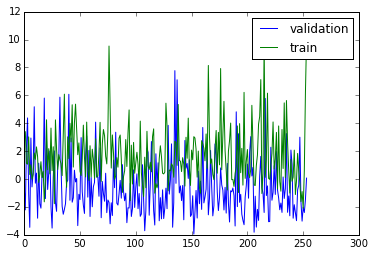

In [14]:
plt.plot(np.log(val_loss), label='validation')
plt.plot(np.log(loss), label='train')
plt.legend()
plt.show()

In [ ]:
plt.plot(val_loss[val_loss<1.0] )

Model with rank as a target

In [ ]:
tracker = trackerModel( nlayers = 3, radius_layer=10, lenght_layer=10., cell_size=4., min_n_tracks=10, max_n_tracks=10, target_rank=True, max_find_track=6)

In [ ]:
d,t = tracker.make_event()

In [ ]:
print d.shape
print t.shape

Regression on the rank of the track as a multi-category classification

In [ ]:
internal = int(tracker.full_size*1)
act='relu'
model = Graph()
model.add_input(name='input',input_shape=(tracker.full_size,))
model.add_node( Dense(input_dim=tracker.full_size,output_dim=internal, activation=act), name='first_dense', input='input')
model.add_node( Dropout(0.5), name = 'drop_dense', input='first_dense')
model.add_node( Dense(input_dim=internal,output_dim=internal, activation=act), name='last_dense',input='drop_dense')
#for pxl in range(tracker.full_size):
nodes=[]
node_names=[]
out_names=[]
for pxl in range(tracker.full_size):
#for pxl in range(2):
    c = 'category_pixel_%d'%pxl
    o = 'output_pixel_%d'%pxl
    nodes.append( Dense(input_dim=internal, output_dim=tracker.max_find_track+1, activation='softmax') )
    model.add_node( nodes[-1] ,name=c ,input='last_dense')
    node_names.append( c )
    model.add_output( o, input=c)
    out_names.append( o )
    

In [ ]:
tracker.max_find_track

In [ ]:
model.compile(optimizer='sgd', loss=dict([(o,'categorical_crossentropy') for o in out_names]))

In [ ]:
model.summary()

In [ ]:
rounds=1
for data,target in tracker.generator(n_events=1000):
    rounds -= 1
    if rounds<0: break
    #print data.shape,target.shape
    t_data = {'input': data}
    t_data.update( dict([(o,target[:,i,:]) for i,o in enumerate(out_names)]))
    #print data.keys()
    #model.evaluate( t_data ,batch_size=10 )
    #model.predict( t_data ,batch_size=10 )
    h = model.fit( t_data, batch_size=10, nb_epoch=100, verbose=0)
    print "done"
    
    

In [ ]:
for data,target in tracker.generator(n_events=10):
    p = model.predict( {'input' : data} )
    break

In [ ]:
#calculate how many pxl LIT are well predicted
total_hits = np.sum(data)
match_hits = 0 
for pxl in range(tracker.full_size):
    #print "pixel",pxl
    pred_rank_pxl = np.argmax(p['output_pixel_%d'%pxl],axis=1)
    halftrue_rank_pxl = np.argmax(target[:,pxl,:], axis=1)
    pxl_data = data[:,pxl]
    match_hits += np.sum(pxl_data*(pred_rank_pxl==halftrue_rank_pxl))

print match_hits,"match out of",total_hits
print "efficiency",float(match_hits)/total_hits,"%"


In [ ]:
#from keras.utils.visualize_util import plot
#plot(model, to_file='model.png')
#from IPython.display import Image
#Image("model.png")

In [ ]:
## this does not work with the version of keras that you have
#main_input = Input(shape=(tracker.full_size,), dtype='int32', name='main_input')
#x = Dense(internal,activation='relu',dropout=0.5)(main_input)
#x = Dense(internal,activation='relu',dropout=0.5)(x)
#outs=[]
#for pxl in range(tracker.full_size):
#    outs.append( Dense(max_search_track, activation='softmax',name='category_pixel_%d'%pxl)  )
#model = Model(input=main_input, output=outs)


Trying to mask out 

In [ ]:
internal = int(tracker.full_size*1.5)
direct = Sequential()
direct.add(Dense(input_dim=tracker.full_size,output_dim=internal, activation='sigmoid' ))
direct.add(Dense(input_dim=internal,output_dim=tracker.full_size, activation='sigmoid' ))
second = Graph()
second.add_input(name='input',input_shape=(tracker.full_size,))

model = Sequential()
model.add(Merge([direct,second], mode='mul'))
model.compile(optimizer='sgd', loss='mse')


In [ ]:
model.count_params()

In [ ]:
batch_size = 10000
model.fit_generator(tracker.generator(batch_size),samples_per_epoch=batch_size,nb_epoch=1000)

In [ ]:
vals = []
N=100
for ev in range(100):

    #x = model.evaluate_generator(tracker.generator(N))
    X_train = np.zeros((N,tracker.full_size))
    Y_train = np.zeros((N,tracker.full_size))
    for i,(d,t) in enumerate(tracker.dataset(N=N)):
        X_train[i,:] = d
        Y_train[i,:] = t 
    x = model.evaluate(X_train, Y_train)
    vals.append( x )
    #print x

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
plt.hist(np.sqrt(vals))
#plt.yscale('log')
#plt.xscale('log')

In [ ]:
np.mean( np.sqrt(vals) )

Using a dataset in memory

In [ ]:
model.fit(X_train, Y_train, nb_epoch=1000 )

You need to mask the output with the input binary mask to only learn the output node that are lit